In [2]:
import pandas as pd
import numpy as np
import datetime
from IPython.display import display
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh') #available styles: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/Data Files/Data Files/'  # Path specific to Dennis
#file_path1 = "/content/drive/MyDrive/Colab Notebooks/Group Project/" #Path specific to Fan
toronto_incidents = 'KSI_Incidents.csv'
file_red_light ="red light.csv" 

In [5]:
incident_data = pd.read_csv(file_path + toronto_incidents)
incident_data['HOUR'] = [pd.to_datetime(dt).hour for dt in incident_data['DATE_TIME']]
incident_data.head(5)

,ACCNUM,ACCLASS,INVOLVED,MOTIVE,X,Y,LATITUDE,LONGITUDE,DATE_TIME,SEASON,YEAR,MONTH,MONTH_NAME,DAY_NAME,HOUR,HOUR_INTERVAL,ROAD_CLASS,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,IMPACTYPE,DISTRICT,NEIGHBOURHOOD,HOOD_ID,LOCCOORD,PEOPLE_COUNT,FATAL_INJURY_COUNT,MAJOR_INJURY_COUNT,MINOR_INJURY_COUNT,NO_INJURY_COUNT,NULL_INJURY_COUNT,DRIVERS_COUNT,PEDESTRIAN_COUNT,PASSENGER_COUNT,CYCLIST_COUNT,OTHER_INVTYPE_COUNT,NULL_INVTYPE_COUNT,PEOPLE_VEH_COUNT,AUTOMOBILE_VEH_COUNT,RECREATIONAL_VEH_COUNT,OTHER_VEH_COUNT,NULL_VEH_COUNT
0,25301,Non-Fatal Injury,"Pedestrian, Automobile",Not Recorded,-8.836220e+06,5.420822e+06,43.710967,-79.377116,2020-01-04 18:50:00,Winter,2020,1,January,Saturday,18,18:00 to 18:59,Major Arterial,Intersection Related,Traffic Signal,Rain,Dark,Wet,Pedestrian Collisions,North York,Leaside-Bennington (56),56,Intersection,2,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0
1,26294,Fatal,"Pedestrian, Automobile",Not Recorded,-8.836047e+06,5.412910e+06,43.659568,-79.375560,2020-01-04 22:14:00,Winter,2020,1,January,Saturday,22,22:00 to 22:59,Major Arterial,Non Intersection,No Control,Clear,"Dark, artificial",Dry,Pedestrian Collisions,Toronto and East York,Moss Park (73),73,Mid-Block,2,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0
2,37330,Non-Fatal Injury,"Pedestrian, Automobile",Aggressive and Distracted Driving Collision,-8.842513e+06,5.411391e+06,43.649699,-79.433650,2020-01-06 15:55:00,Winter,2020,1,January,Monday,15,15:00 to 15:59,Minor Arterial,At Intersection,Traffic Signal,Clear,"Dawn, artificial",Dry,Pedestrian Collisions,Toronto East York,Little Portugal (84),84,Intersection,2,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0
3,45664,Non-Fatal Injury,Automobile,Aggressive and Distracted Driving Collision,-8.827355e+06,5.423072e+06,43.725577,-79.297481,2020-01-07 18:50:00,Winter,2020,1,January,Tuesday,18,18:00 to 18:59,Major Arterial,At Intersection,Traffic Signal,Clear,Dark,Dry,Turning Movement,Scarborough,Clairlea-Birchmount (120),120,Intersection,3,0,1,1,1,0,2,0,1,0,0,0,0,2,0,0,0
4,56815,Non-Fatal Injury,Automobile,"Speeding Related Collision, Red Light Related...",-8.858314e+06,5.419422e+06,43.701876,-79.575588,2020-01-09 11:00:00,Winter,2020,1,January,Thursday,11,11:00 to 11:59,Major Arterial,At Intersection,Traffic Signal,Clear,Daylight,Dry,Angle,Etobicoke York,West Humber-Clairville (1),1,Intersection,4,0,1,0,3,0,4,0,0,0,0,0,0,3,0,1,0


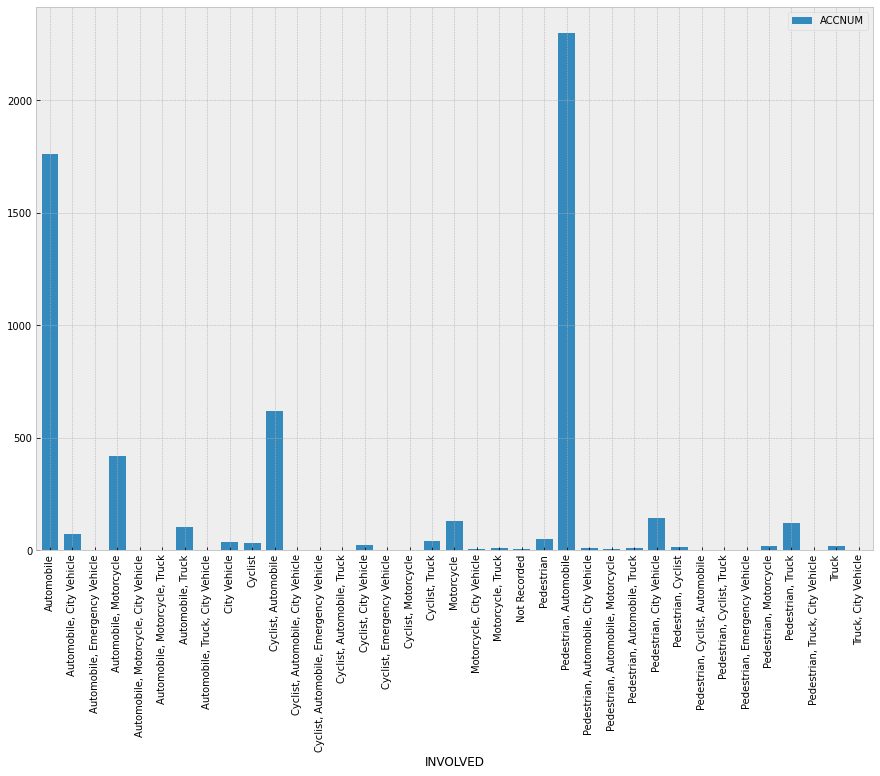

In [6]:
incident_data.groupby(['INVOLVED']).aggregate({'ACCNUM': 'count'}).\
    plot(kind='bar', width=0.75, rot=90, figsize=(15, 10)); 

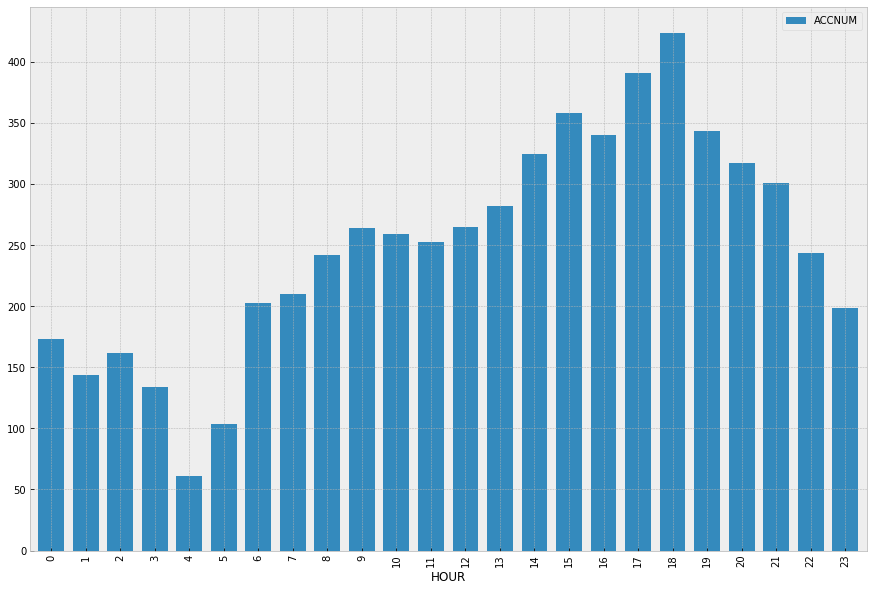

In [7]:
incident_data.groupby(['HOUR']).aggregate({'ACCNUM': 'count'}).\
    plot(kind='bar', width=0.75, rot=90, figsize=(15, 10)); 

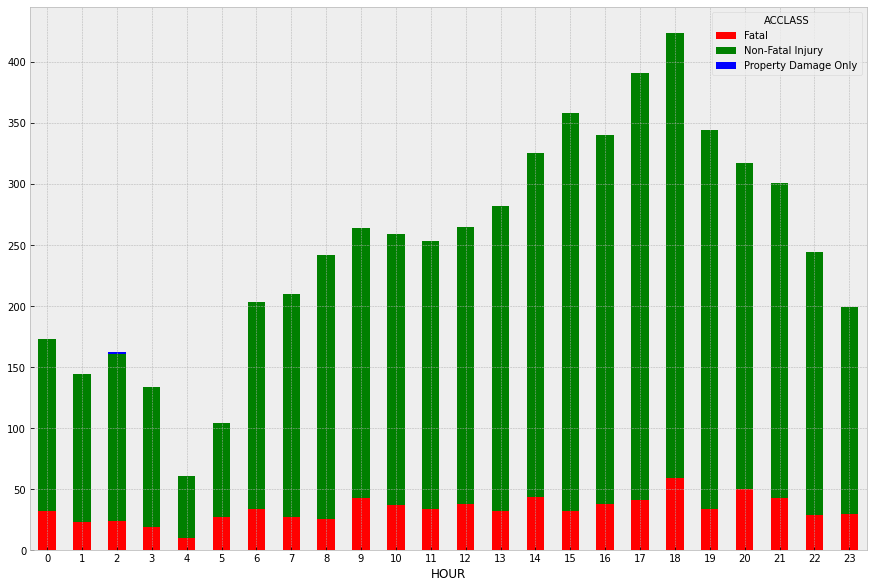

In [8]:
pd.crosstab(incident_data['HOUR'], incident_data['ACCLASS'], 
            aggfunc='count', values=incident_data['ACCNUM']).\
            plot(kind='bar', stacked=True, rot=0, figsize=(15, 10),
                 color=['red', 'green', 'blue']);

In [9]:
dec = 2
local_incident_data = incident_data
local_incident_data['LONGITUDE'] = local_incident_data['LONGITUDE'].\
    map(lambda x: int(x * 10 ** dec) / (10 ** dec) - 0.5 / 10 ** dec)
local_incident_data['LATITUDE'] = local_incident_data['LATITUDE'].\
    map(lambda x: int(x * 10 ** dec) / (10 ** dec) + 0.5 / 10 ** dec) 
    
local_summary = local_incident_data.groupby(['LONGITUDE', 'LATITUDE', 'ACCLASS']).\
                aggregate({'ACCNUM': 'count'}).reset_index()

In [12]:
my_token = 'Enter your token here'
px.set_mapbox_access_token(my_token)

fig = px.scatter_mapbox(local_summary, lat='LATITUDE', lon='LONGITUDE',
                        title='Toronto Serious Vehicle Collisions By Area', 
                        category_orders={'ACCLASS':['Property Damage Only',
                                                    'Non-Fatal Injury',
                                                    'Fatal']}, 
                        color='ACCLASS',
                        color_discrete_map={'Fatal':'red', 
                                            'Non-Fatal Injury':'blue', 
                                            'Property Damage Only':'green'},
                        size='ACCNUM',
                        opacity=0.5,
                        hover_name='ACCLASS',
                        hover_data=['ACCNUM'],
                        center={'lat':43.73, 'lon':-79.4},
                        mapbox_style='streets',  # This style requires a token
#                        mapbox_style='open-street-map',
                        height=800, width=1000, zoom=10.15)

fig.show()
fig.write_html(file_path+'Toronto Case Map.html')